In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_excel("exams.xlsx")

In [3]:
df

,Matr.Nr.,Name,Studienkennzahl
0,a123,A,99
1,e234,B,55
2,f345,C,77
3,a456,D,22
4,m567,E,99
5,n789,F,44


## Raumzuweisung

In [4]:
def room_for_matr_nr(matr_nr):
    if int(matr_nr[1:]) % 2 == 0:
        return 'A'
    else:
        return 'B'

df['Raum'] = [room_for_matr_nr(matr_nr) for matr_nr in df['Matr.Nr.']]
df

,Matr.Nr.,Name,Studienkennzahl,Raum
0,a123,A,99,B
1,e234,B,55,A
2,f345,C,77,B
3,a456,D,22,A
4,m567,E,99,B
5,n789,F,44,B


## Noten

In [5]:
GRADES_MAIL = """n789: 4
e234: 1
m567: 5
f345: 4
a456: 3
"""

In [6]:
lines = GRADES_MAIL.splitlines()
lines

['n789: 4', 'e234: 1', 'm567: 5', 'f345: 4', 'a456: 3']

In [7]:
lines_pairs = [line.split(":") for line in lines]
lines_pairs

[['n789', ' 4'],
 ['e234', ' 1'],
 ['m567', ' 5'],
 ['f345', ' 4'],
 ['a456', ' 3']]

In [8]:
grades_dict = {matr_nr: int(note) for (matr_nr, note) in lines_pairs}
grades_dict

{'n789': 4, 'e234': 1, 'm567': 5, 'f345': 4, 'a456': 3}

In [10]:
df['Note'] = [ grades_dict.get(matr_nr, math.nan) for matr_nr in df['Matr.Nr.']]
df

,Matr.Nr.,Name,Studienkennzahl,Raum,Note
0,a123,A,99,B,NaN
1,e234,B,55,A,1.0
2,f345,C,77,B,4.0
3,a456,D,22,A,3.0
4,m567,E,99,B,5.0
5,n789,F,44,B,4.0


In [12]:
df_index = df.set_index("Matr.Nr.")
df_index

,Name,Studienkennzahl,Raum,Note
Matr.Nr.,,,,
a123,A,99,B,NaN
e234,B,55,A,1.0
f345,C,77,B,4.0
a456,D,22,A,3.0
m567,E,99,B,5.0
n789,F,44,B,4.0


In [17]:
for matr_nr, note in lines_pairs:
    df_index.loc[matr_nr, 'Note'] = int(note)

In [18]:
df_index

,Name,Studienkennzahl,Raum,Note
Matr.Nr.,,,,
a123,A,99,B,NaN
e234,B,55,A,1.0
f345,C,77,B,4.0
a456,D,22,A,3.0
m567,E,99,B,5.0
n789,F,44,B,4.0


## Einser zählen

In [28]:
df[ df['Note'] == 1 ]

,Matr.Nr.,Name,Studienkennzahl,Raum,Note
1,e234,B,55,A,1.0


In [29]:
df[ df['Raum'] == 'A' ]

,Matr.Nr.,Name,Studienkennzahl,Raum,Note
1,e234,B,55,A,1.0
3,a456,D,22,A,3.0


In [32]:
len(df[ (df['Note'] == 1) & (df['Raum'] == 'A')  ])

1

In [33]:
len(df[ (df['Note'] == 1) & (df['Raum'] == 'B')  ])

0

In [36]:
{
    room: len(df[ (df['Note'] == 1) & (df['Raum'] == room) ])
    for room in df['Raum'].unique()
}

{'B': 0, 'A': 1}

array([<AxesSubplot:title={'center':'A'}>,
       <AxesSubplot:title={'center':'B'}>], dtype=object)

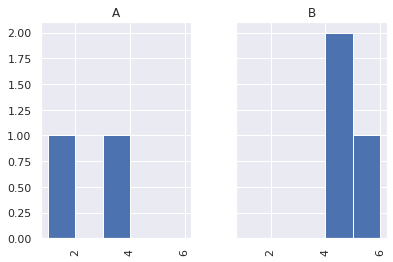

In [43]:
import seaborn
seaborn.set()

df.hist(
    column="Note",
    bins=[1,2,3,4,5,6],
    sharey=True,
    by="Raum",
)